In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pickle
import pandas as pd

In [ ]:
def generate_multicol_countplot(df, cols, title, ax=None):
    sums = []
    for col in cols:
        sums.append(df[col].sum())
    # Removing the x{num}_ that comes with sklearn one hot encode
    cols = [col[3:].capitalize() for col in cols if '_' in col]

    if ax is None:
        sns.barplot(x=sums, y=list(range(len(cols))), orient='h')
        plt.yticks(list(range(len(cols))), cols)
        plt.title(title)
    else:
        sns.barplot(x=sums, y=list(range(len(cols))), orient='h', ax=ax)
        ax.set_yticklabels(cols)
        ax.set_title(title)

In [ ]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

# Clustering Results
## Determining Optimal K
* Elbow method

In [ ]:
with open('Data/pickles/elbow', 'rb') as file:
    clustering_scores = pickle.load(file)

In [ ]:
sns.lineplot(x=clustering_scores['clusters'], y=clustering_scores['scores'])
plt.xlim(0.5, 10)

* Seems that 3 clusters is the optimal number for clusters

In [ ]:
df = pd.read_pickle('Data/pickles/clustered_df')
print(df.columns)

In [ ]:
cluster0_df = df[df['cluster'] == 'cluster_0']
cluster1_df = df[df['cluster'] == 'cluster_1']
cluster2_df = df[df['cluster'] == 'cluster_2']

# Cluster Cardinality
Let's see how the data falls into the different clusters

In [ ]:
sns.countplot(data=df, x='cluster')

* Interesting that a large portion of the data falls into cluster 0
* I am hoping that the data in cluster_1 provides something very specific that could lead to some interesting discoveries
# Distributions between Clusters

In [ ]:
plt.figure(figsize=(20,15))

temp_df = df.drop(['x0_CAN', 'x0_MEX', 'x0_PR', 'x0_US', 'x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions', 'x2_01', 'x2_08', 'x2_99', 'x3_02', 'x3_05',
       'x3_09', 'x3_80', 'x3_90', 'x4_ADDRESS_VERIFICATION', 'x4_PURCHASE',
       'x4_REVERSAL', 'x5_CAN', 'x5_MEX', 'x5_PR', 'x5_US', 'matchingCVV',
       'isFraud','expirationDateKeyInMatch', 'cardPresent', 'accountNumber'], axis=1)

sns.pairplot(data=temp_df, hue='cluster')

* Seems the cluster a transaction falls in is dependent on different banking properties/economic status that each customer has

It would help to take a closer look at each of the individual features as the scatter plot only gives an idea of how the different clusters differ
## Current Balance

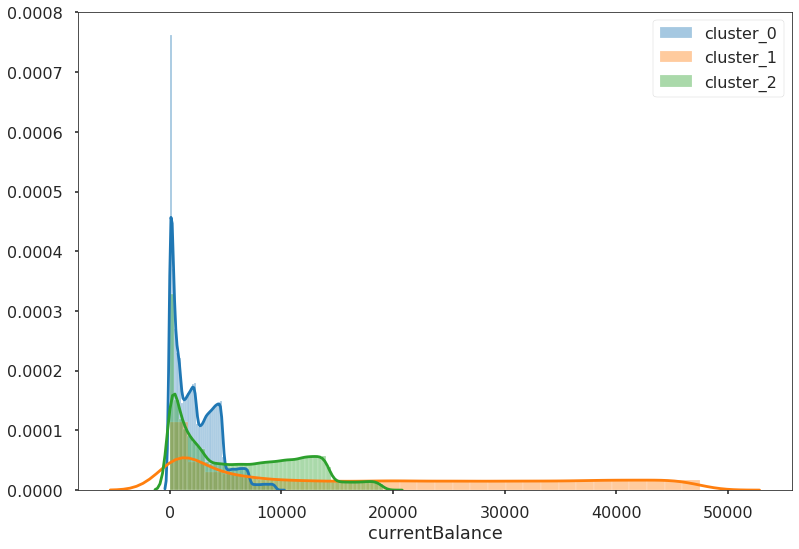

In [86]:
sns.distplot(cluster0_df['currentBalance'], label='cluster_0')
sns.distplot(cluster1_df['currentBalance'], label='cluster_1')
sns.distplot(cluster2_df['currentBalance'], label='cluster_2')
plt.legend()

* At first glance, cluster_1 seems to contain people that are wealthier, but in other discoveries I found that one wealthy individual (Account No. 882815134) alone had 11425 transactions and this histogram could be displaying this persons current balance decreasing for a large portion of the graph.
    * It's likely that this is the case since you can see the line dip down a little after 10,000 and slowly rise again and then just cruise at a constant rate
* As for the other two clusters, it seems that cluster_2 contains more people with larger current balances than cluster_0

In [55]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

# Merchant Category Popularity between Clusters

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,21))

generate_multicol_countplot(cluster0_df, ['x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions'], 'Cluster 0', ax=ax[0])

generate_multicol_countplot(cluster1_df, ['x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions'], 'Cluster 1', ax=ax[1])

generate_multicol_countplot(cluster2_df, ['x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions'], 'Cluster 2', ax=ax[2])

* Cluster 0 and 2 are fairly similar -- cluster 0 just has many more elements
* Interesting that the most popular merchant category in cluster 1 is hotel related transactions despite online retail being the most popular among the entire data set
* Aside from that, the proportions of the rest of the merchant categories among all clusters seem to be about the same

## Exploring Hotel Related Transactions in Cluster 2
* I am interested in why there are so many hotel related transactions in cluster 1 in comparison to the rest
* My one initial guess is that it's possible that it might be a few people that just had a lot of hotel related transactions -- even so there are a significant amount of transactions, so I doubt it

In [ ]:
cluster1_hotel = cluster1_df[cluster1_df['x1_hotels'] == 1]
len(cluster1_hotel['accountNumber'].unique())

* Interesting as there are only 42 unique accounts in this cluster, but over 12000 hotel related transactions

In [87]:
cluster1_hotel['accountNumber'].value_counts()

882815134    11425
650959115      161
181877220      123
829582491       82
769579276       79
922749190       78
700725639       73
585333246       46
781784171       41
807819771       28
501222917       23
807103120       20
371832344       19
288797686       16
441439342       11
699537899       10
462479214        8
222265414        7
741550410        7
286033703        6
789466098        6
207335334        5
205408589        5
375218159        5
569236395        4
724890027        4
826344097        3
441184111        3
575686449        3
101738384        3
787110269        2
372858462        2
135652205        2
765396225        2
585954791        2
522664093        2
991432558        2
258845873        1
897227769        1
316447056        1
175471624        1
220057198        1
Name: accountNumber, dtype: int64

* Very interesting that one customer has so many transactions
* This answers the question as to why cluster 1 had so many hotel related transactions

# Fradulent Transactions
* I am hopeful that there will be some sort of trend in fraudulent transactions found by clustering

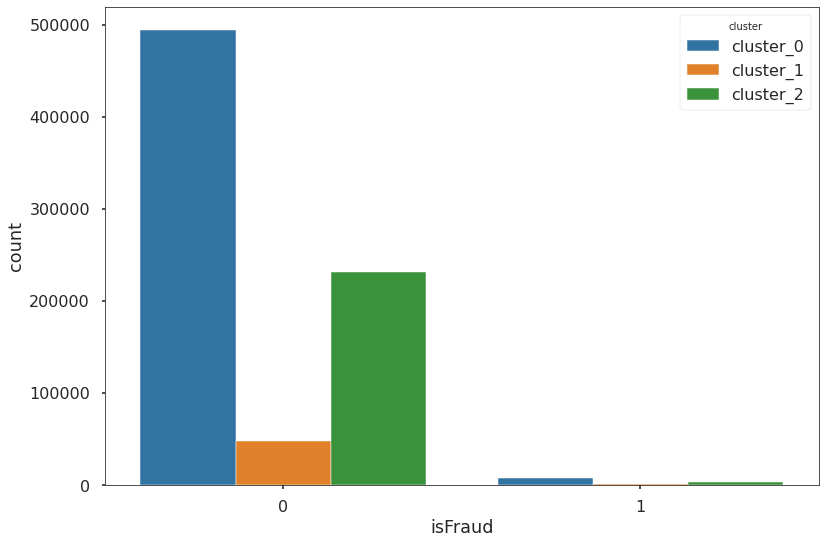

In [30]:
sns.countplot(data=df, x='isFraud', hue='cluster')

* Does not seem to be the case unfortunately